In [1]:
import pandas as pd
import numpy as np

# ----- 시각화 -----
import matplotlib.pyplot as plt

# ----- DL -----
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from tensorflow.keras import regularizers

#----- time ----
import datetime
import time

#----- scaler-----
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## get data

In [65]:
df = pd.read_csv('./data/SPY.csv',index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


## parameter

In [66]:
test_sample = int(len(df)*0.2)
window_size = 10

<AxesSubplot:xlabel='Date'>

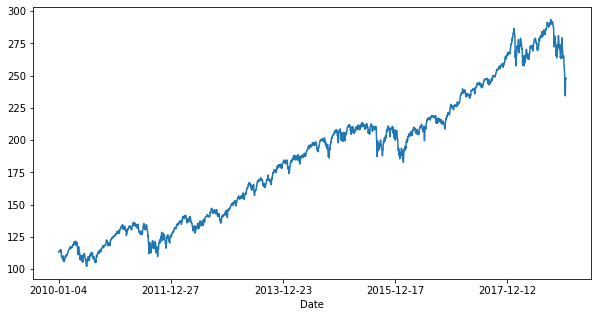

In [67]:
df.Close.plot(figsize=(10,5))

In [68]:
x_train = df.Close[:-test_sample]
x_test = df.Close[-test_sample:]

## scaling

In [69]:
scaler = MinMaxScaler()
scaler.fit(np.array(x_train).reshape(-1,1))
x_train_scaled = scaler.transform(np.array(x_train).reshape(-1,1))
x_test_scaled = scaler.transform(np.array(x_test).reshape(-1,1))

 ## make sequence

In [70]:
def make_sequence(x, window_size):
    X = []
    for i in range(len(x)-window_size):
        X.append([x[i+t] for t in range(window_size)])
    X = np.array(X)
    return X

In [71]:
seq_train = make_sequence(x_train_scaled,window_size)
seq_test = make_sequence(x_test_scaled,window_size)

## simple model

In [72]:
model = Sequential()
model.add(Dense(128, input_shape=(window_size,1), activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 10, 128)           256       
                                                                 
 dense_34 (Dense)            (None, 10, 3)             387       
                                                                 
 dense_35 (Dense)            (None, 10, 128)           512       
                                                                 
 dense_36 (Dense)            (None, 10, 1)             129       
                                                                 
Total params: 1,284
Trainable params: 1,284
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mse',optimizer='adam')
his = model.fit(seq_train,seq_train,
               epochs=100,
               batch_size=512,
               shuffle=True,
               validation_data=(seq_test,seq_test))

Epoch 1/100
4/4 [==============================] - 1s 60ms/step - loss: 0.2910 - val_loss: 1.3605
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2860 - val_loss: 1.3452
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2808 - val_loss: 1.3287
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2753 - val_loss: 1.3107
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2694 - val_loss: 1.2911
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2633 - val_loss: 1.2698
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2567 - val_loss: 1.2469
Epoch 8/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2498 - val_loss: 1.2222
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.2426 - val_loss: 1.1956
Epoch 10/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2350 - val_loss: 1.1670
Epoch 11/100
4/4 [=

4/4 [==============================] - 0s 14ms/step - loss: 5.2505e-04 - val_loss: 0.0011
Epoch 84/100
4/4 [==============================] - 0s 14ms/step - loss: 5.1500e-04 - val_loss: 0.0010
Epoch 85/100
4/4 [==============================] - 0s 13ms/step - loss: 5.0606e-04 - val_loss: 9.7846e-04
Epoch 86/100
4/4 [==============================] - 0s 13ms/step - loss: 4.9802e-04 - val_loss: 9.3409e-04
Epoch 87/100
4/4 [==============================] - 0s 13ms/step - loss: 4.9068e-04 - val_loss: 8.9295e-04
Epoch 88/100
4/4 [==============================] - 0s 13ms/step - loss: 4.8370e-04 - val_loss: 8.5703e-04
Epoch 89/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7718e-04 - val_loss: 8.2531e-04
Epoch 90/100
4/4 [==============================] - 0s 13ms/step - loss: 4.7107e-04 - val_loss: 7.9817e-04
Epoch 91/100
4/4 [==============================] - 0s 13ms/step - loss: 4.6518e-04 - val_loss: 7.7110e-04
Epoch 92/100
4/4 [==============================] - 0s 13m

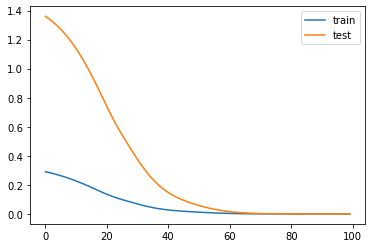

In [18]:
plt.plot(his.history['loss'],label='train')
plt.plot(his.history['val_loss'],label='test')
plt.legend()

In [22]:
decoded_stock = model.predict(seq_train)
decoded_stock.shape

(1801, 10, 128)

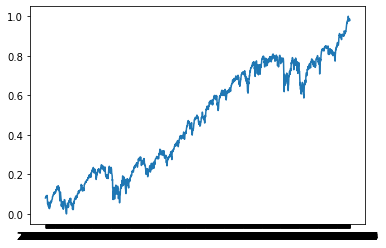

In [23]:
plt.plot(x_train.index.to_list(),x_train_scaled, label= 'x_train_scaled')
# plt.plot(x_train.index.to_list(), decoded_stock, label= 'x_train_decoded')

# 시도

In [104]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='real')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

Actual
[[0.00071864]
 [0.01803382]
 [0.11465593]
 [0.1213861 ]
 [0.1712333 ]]
Pred
[[0.00073847]
 [0.01833689]
 [0.10769933]
 [0.1226781 ]
 [0.17948735]]


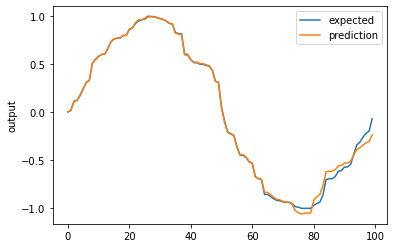

In [89]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
x = np.sort((360 * rng.rand(100, 1)), axis=0)
y = np.array([np.sin(x*(np.pi/180.0)).ravel()]).T

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,batch_size=len(x),epochs=25000)

pred = model.predict(x)

print("Actual")
print(y[0:5])

print("Pred")
print(pred[0:5])

chart_regression(pred.flatten(),y,sort=False)

In [137]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

df = pd.read_csv('./data/SPY.csv',index_col=0)
real = df.Close[:50]
x = np.array(df.Close[:50]).reshape(-1,1)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,x,verbose=0,batch_size=len(x),epochs=200)

pred = model.predict(x)

print("Actual")
print(x_train[0:5])

print("Pred")
print(pred[0:5])

Actual
[[113.33000183]
 [113.62999725]
 [113.70999908]
 [114.19000244]
 [114.56999969]]
Pred
[[113.32334 ]
 [113.622   ]
 [113.70165 ]
 [114.179504]
 [114.55781 ]]


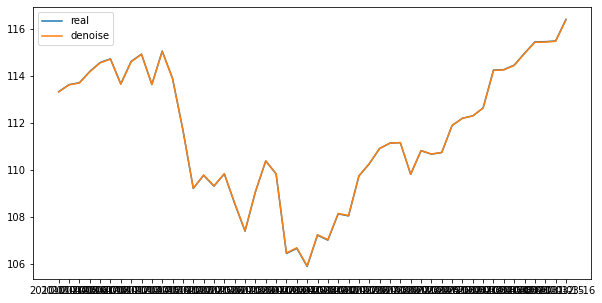

In [138]:
plt.figure(figsize=(10,5))
plt.plot(real.index.to_list(),real, label='real')
plt.plot(real.index.to_list(), pred.flatten(),label='denoise')
plt.legend()